<a href="https://colab.research.google.com/github/akriti-sharma-parakh/zee-recommender-system/blob/main/zee_recommender_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install --only-binary=all scikit-surprise "numpy>=1.19,<2"

  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.2
    Uninstalling numpy-2.3.2:
      Successfully uninstalled numpy-2.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible

In [5]:
!pip install seaborn

In [1]:
import numpy, surprise
print("NumPy:", numpy.__version__, "Surprise:", surprise.__version__)


NumPy: 1.26.4 Surprise: 1.1.4


In [3]:
#OPTIONAL: if the above installation does not work
!pip install --upgrade "cython<3.0" numpy  # keep NumPy 2.x
!pip install --no-binary scikit-surprise scikit-surprise
# restart kernel afterwards


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 19.6 MB/s eta 0:00:00
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.12
    Uninstalling Cython-3.0.12:
      Successfully uninstalled Cython-3.0.12


# ** Zee Recommender Systems**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Loading the data


In [3]:
users = pd.read_csv("/content/drive/MyDrive/Zee/zee-users.dat", sep="::", engine="python",
                    names=["UserID", "Gender", "Age", "Occupation", "Zip-code"])

# Load ratings.dat
ratings = pd.read_csv("/content/drive/MyDrive/Zee/zee-ratings.dat", sep="::", engine="python",
                      names=["UserID", "MovieID", "Rating", "Timestamp"])

# Load movies.dat
movies = pd.read_csv("/content/drive/MyDrive/Zee/zee-movies.dat", sep="::", engine="python",
                     names=["MovieID", "Title", "Genres"], encoding='latin-1') # Added encoding


In [4]:
users

,UserID,Gender,Age,Occupation,Zip-code
0,UserID,Gender,Age,Occupation,Zip-code
1,1,F,1,10,48067
2,2,M,56,16,70072
3,3,M,25,15,55117
4,4,M,45,7,02460
...,...,...,...,...,...
6036,6036,F,25,15,32603
6037,6037,F,45,1,76006
6038,6038,F,56,1,14706
6039,6039,F,45,0,01060


In [5]:
ratings

,UserID,MovieID,Rating,Timestamp
0,UserID,MovieID,Rating,Timestamp
1,1,1193,5,978300760
2,1,661,3,978302109
3,1,914,3,978301968
4,1,3408,4,978300275
...,...,...,...,...
1000205,6040,1091,1,956716541
1000206,6040,1094,5,956704887
1000207,6040,562,5,956704746
1000208,6040,1096,4,956715648


In [6]:
movies

,MovieID,Title,Genres
0,Movie ID,Title,Genres
1,1,Toy Story (1995),Animation|Children's|Comedy
2,2,Jumanji (1995),Adventure|Children's|Fantasy
3,3,Grumpier Old Men (1995),Comedy|Romance
4,4,Waiting to Exhale (1995),Comedy|Drama
...,...,...,...
3879,3948,Meet the Parents (2000),Comedy
3880,3949,Requiem for a Dream (2000),Drama
3881,3950,Tigerland (2000),Drama
3882,3951,Two Family House (2000),Drama


In [7]:

# Merge all into one dataframe
df = ratings.merge(users, on="UserID").merge(movies, on="MovieID")
df

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy
...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,M,25,6,11106,Weekend at Bernie's (1989),Comedy
1000205,6040,1094,5,956704887,M,25,6,11106,"Crying Game, The (1992)",Drama|Romance|War
1000206,6040,562,5,956704746,M,25,6,11106,Welcome to the Dollhouse (1995),Comedy|Drama
1000207,6040,1096,4,956715648,M,25,6,11106,Sophie's Choice (1982),Drama


Performing exploratory data analysis like checking the structure & characteristics of the dataset and cleaning the data


check first five rows


In [8]:
df.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy


View column names

In [9]:
df.columns

Index(['UserID', 'MovieID', 'Rating', 'Timestamp', 'Gender', 'Age',
       'Occupation', 'Zip-code', 'Title', 'Genres'],
      dtype='object')

Check Dimensions (rows, columns)


In [10]:
df.shape

(1000209, 10)

Summary of structure

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   UserID      1000209 non-null  object
 1   MovieID     1000209 non-null  object
 2   Rating      1000209 non-null  object
 3   Timestamp   1000209 non-null  object
 4   Gender      1000209 non-null  object
 5   Age         1000209 non-null  object
 6   Occupation  1000209 non-null  object
 7   Zip-code    1000209 non-null  object
 8   Title       1000209 non-null  object
 9   Genres      1000209 non-null  object
dtypes: object(10)
memory usage: 76.3+ MB


Summary Statistics

In [12]:
df.describe()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
count,1000209,1000209,1000209,1000209,1000209,1000209,1000209,1000209,1000209,1000209
unique,6040,3706,5,458455,2,7,21,3439,3706,301
top,4169,2858,4,975528402,M,25,4,94110,American Beauty (1999),Comedy
freq,2314,3428,348971,30,753769,395556,131032,3802,3428,116883


Data types of each columns

In [13]:
df.dtypes

,0
UserID,object
MovieID,object
Rating,object
Timestamp,object
Gender,object
Age,object
Occupation,object
Zip-code,object
Title,object
Genres,object


Count of non null values per column


In [14]:
df.count()

,0
UserID,1000209
MovieID,1000209
Rating,1000209
Timestamp,1000209
Gender,1000209
Age,1000209
Occupation,1000209
Zip-code,1000209
Title,1000209
Genres,1000209


Unique values per column

In [15]:
for col in df.columns:
    unique_values = df[col].nunique()
    print(f"Unique values in column {col}:{unique_values}")

Unique values in column UserID:6040
Unique values in column MovieID:3706
Unique values in column Rating:5
Unique values in column Timestamp:458455
Unique values in column Gender:2
Unique values in column Age:7
Unique values in column Occupation:21
Unique values in column Zip-code:3439
Unique values in column Title:3706
Unique values in column Genres:301


Check missing values or duplicated values

In [16]:
df.isnull().sum()

,0
UserID,0
MovieID,0
Rating,0
Timestamp,0
Gender,0
Age,0
Occupation,0
Zip-code,0
Title,0
Genres,0


In [17]:
df.duplicated().sum()

0

FEATURE ENGINEERING


In [18]:
df['ReleaseYear'] = df['Title'].str.extract(r'\((\d{4})\)').astype(float)
df

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres,ReleaseYear
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama,1975.0
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical,1996.0
2,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),Musical|Romance,1964.0
3,1,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),Drama,2000.0
4,1,2355,5,978824291,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy,1998.0
...,...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,M,25,6,11106,Weekend at Bernie's (1989),Comedy,1989.0
1000205,6040,1094,5,956704887,M,25,6,11106,"Crying Game, The (1992)",Drama|Romance|War,1992.0
1000206,6040,562,5,956704746,M,25,6,11106,Welcome to the Dollhouse (1995),Comedy|Drama,1995.0
1000207,6040,1096,4,956715648,M,25,6,11106,Sophie's Choice (1982),Drama,1982.0


In [19]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')
df['Timestamp']

/tmp/ipython-input-592594302.py:1: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')


,Timestamp
0,2000-12-31 22:12:40
1,2000-12-31 22:35:09
2,2000-12-31 22:32:48
3,2000-12-31 22:04:35
4,2001-01-06 23:38:11
...,...
1000204,2000-04-26 02:35:41
1000205,2000-04-25 23:21:27
1000206,2000-04-25 23:19:06
1000207,2000-04-26 02:20:48


# Decade Analysis:

In [20]:
df['Decade'] = (df['ReleaseYear'] // 10 * 10).astype(int)
df['Decade'].value_counts()


,count
Decade,
1990,532843
1980,224056
1970,82552
1960,48555
2000,41000
1950,35232
1940,21501
1930,12729
1920,1696


Number of genre per movies:

In [21]:
df['GenreCount'] = df['Genres'].str.count(r'\|') + 1

# EDA


## Grouped Statistics

In [22]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
movie_stats = df.groupby('Title')['Rating'].agg(['mean', 'count']).sort_values(by='count', ascending=False)
movie_stats

,mean,count
Title,,
American Beauty (1999),4.317386,3428
Star Wars: Episode IV - A New Hope (1977),4.453694,2991
Star Wars: Episode V - The Empire Strikes Back (1980),4.292977,2990
Star Wars: Episode VI - Return of the Jedi (1983),4.022893,2883
Jurassic Park (1993),3.763847,2672
...,...,...
Target (1995),4.000000,1
I Don't Want to Talk About It (De eso no se habla) (1993),4.000000,1
An Unforgettable Summer (1994),3.000000,1


### Most active age group

In [23]:
df['Age'].value_counts()


,count
Age,
25,395556
35,199003
18,183536
45,83633
50,72490
56,38780
1,27211


### Occupations that rated the most movies:


In [24]:
df['Occupation'].value_counts()


,count
Occupation,
4,131032
0,130499
7,105425
1,85351
17,72816
20,60397
12,57214
2,50068
14,49109


### Most rated movies:


In [25]:
df['Title'].value_counts().head(10)

,count
Title,
American Beauty (1999),3428
Star Wars: Episode IV - A New Hope (1977),2991
Star Wars: Episode V - The Empire Strikes Back (1980),2990
Star Wars: Episode VI - Return of the Jedi (1983),2883
Jurassic Park (1993),2672
Saving Private Ryan (1998),2653
Terminator 2: Judgment Day (1991),2649
"Matrix, The (1999)",2590
Back to the Future (1985),2583


### Number of genre per movies:

In [26]:
df['GenreCount'] = df['Genres'].str.count(r'\|') + 1


### Visualize Ratings Distribution:

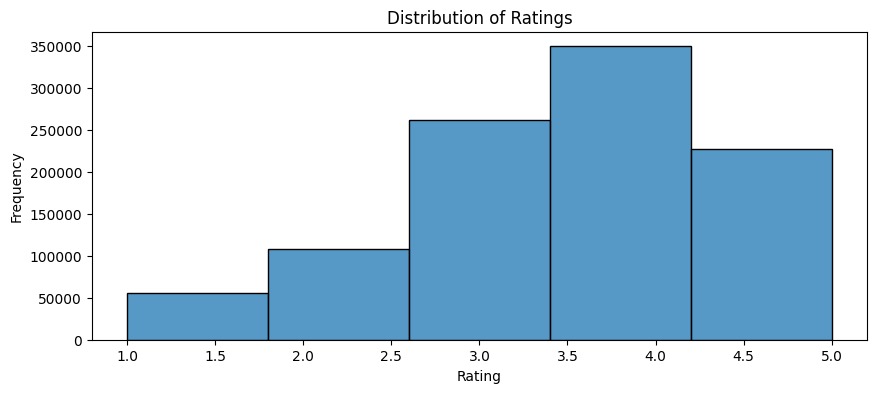

In [27]:
plt.figure(figsize=(10, 4))
sns.histplot(df['Rating'], bins=5, kde=False)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()


#  QUESTION 3 :  Build a Recommender System based on Pearson Correlation (10 Points)

In [28]:
# Pivot table: users as rows, movies as columns
pivot_table = df.pivot_table(index='UserID', columns='Title', values='Rating')

# Fill NaN with 0 (or could use movie mean rating)
pivot_filled = pivot_table.fillna(0)

pivot_filled.head()


Title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
UserID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,5.0


## Compute Pearson Correlation Between Movies


In [29]:
# Pearson correlation between movies
pearson_corr = pivot_table.corr(method='pearson', min_periods=50)
# min_periods=50 → only compare movies rated by at least 50 same users


In [30]:
pearson_corr

Title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
Title,,,,,,,,,,,,,,,,,,,,,
"$1,000,000 Duck (1971)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Night Mother (1986),NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Til There Was You (1997),NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"'burbs, The (1989)",NaN,NaN,NaN,1.000000,NaN,NaN,0.189689,0.088541,0.101064,0.047590,...,NaN,0.278425,NaN,NaN,NaN,NaN,0.039503,NaN,NaN,NaN
...And Justice for All (1979),NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.166965,NaN,0.303093,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Zed & Two Noughts, A (1985)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zero Effect (1998),NaN,NaN,NaN,0.039503,NaN,NaN,0.199307,0.202831,NaN,0.214276,...,NaN,0.089512,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.392144
Zero Kelvin (Kjærlighetens kjøtere) (1995),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Simple Recommendation Function


In [31]:
def get_similar_movies_pearson(movie_title, n=5):
    if movie_title not in pearson_corr.columns:
        return f"Movie '{movie_title}' not found in dataset."

    # Get correlation scores for the movie
    similar_movies = pearson_corr[movie_title].dropna()

    # Sort by correlation score, exclude the movie itself
    similar_movies = similar_movies.sort_values(ascending=False)
    similar_movies = similar_movies.drop(movie_title, errors='ignore')

    return similar_movies.head(n)


In [32]:
# Get similar movies for "Toy Story (1995)"
similar_movies = get_similar_movies_pearson("Toy Story (1995)")

# Display the similar movies
print("Movies similar to 'Toy Story (1995)':")
display(similar_movies)

Movies similar to 'Toy Story (1995)':


,Toy Story (1995)
Title,
Toy Story 2 (1999),0.630386
Little Big League (1994),0.499849
"Incredible Journey, The (1963)",0.491433
FairyTale: A True Story (1997),0.485072
Ninotchka (1939),0.481678


# QUESTION 4: Build a Recommender System based on Cosine Similarity. (20 Points)


## We need the user-item matrix first.


In [33]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# User-Item rating matrix
pivot_table = df.pivot_table(index='UserID', columns='Title', values='Rating')

# Fill NaN with 0 for cosine similarity
pivot_filled = pivot_table.fillna(0)


In [34]:
pivot_table

Title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
UserID,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
pivot_filled

Title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
UserID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## User Similarity Matrix :

In [36]:
user_similarity = cosine_similarity(pivot_filled)
user_similarity_df = pd.DataFrame(user_similarity,
                                   index=pivot_filled.index,
                                   columns=pivot_filled.index)

print("User Similarity Matrix:")
user_similarity_df


User Similarity Matrix:


UserID,1,10,100,1000,1001,1002,1003,1004,1005,1006,...,990,991,992,993,994,995,996,997,998,999
UserID,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.255288,0.123967,0.207800,0.139061,0.110320,0.121384,0.179143,0.103137,0.052816,...,0.079367,0.038048,0.032136,0.066641,0.070052,0.035731,0.170184,0.159267,0.119356,0.122059
10,0.255288,1.000000,0.258047,0.278753,0.154858,0.112222,0.141111,0.428224,0.188569,0.101856,...,0.153462,0.186086,0.083224,0.123288,0.117829,0.145650,0.300175,0.160346,0.132506,0.246251
100,0.123967,0.258047,1.000000,0.297539,0.075597,0.110450,0.358686,0.236065,0.171609,0.099147,...,0.098235,0.097953,0.065152,0.176048,0.271311,0.033754,0.344290,0.204302,0.113522,0.306104
1000,0.207800,0.278753,0.297539,1.000000,0.094710,0.047677,0.201722,0.353782,0.323584,0.130702,...,0.170100,0.076779,0.000000,0.197410,0.380741,0.044404,0.330748,0.172803,0.098456,0.245292
1001,0.139061,0.154858,0.075597,0.094710,1.000000,0.164551,0.053788,0.149019,0.137336,0.134462,...,0.146001,0.026842,0.096832,0.117641,0.092065,0.109499,0.221710,0.100597,0.269456,0.175194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.035731,0.145650,0.033754,0.044404,0.109499,0.072578,0.031406,0.088304,0.061001,0.032265,...,0.080559,0.252222,0.074207,0.097260,0.048650,1.000000,0.063925,0.019459,0.075830,0.052428
996,0.170184,0.300175,0.344290,0.330748,0.221710,0.224779,0.185226,0.349899,0.285861,0.164045,...,0.205186,0.086546,0.062523,0.183712,0.217672,0.063925,1.000000,0.174127,0.178834,0.417330
997,0.159267,0.160346,0.204302,0.172803,0.100597,0.068980,0.170771,0.171951,0.105527,0.049536,...,0.187734,0.030588,0.081380,0.160234,0.110656,0.019459,0.174127,1.000000,0.186575,0.182452


## Item-Based KNN Recommender:


In [37]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Fit KNN model
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(pivot_filled.T)

def recommend_movies_knn(movie_title, n=5):
    if movie_title not in pivot_filled.columns:
        return f"Movie '{movie_title}' not found in dataset."

    movie_index = np.where(pivot_filled.columns == movie_title)[0][0]
    distances, indices = knn.kneighbors([pivot_filled.T.iloc[movie_index]], n_neighbors=n+1)

    recommendations = []
    for i in range(1, len(distances[0])):  # skip the first one (same movie)
        rec_title = pivot_filled.columns[indices[0][i]]
        rec_distance = distances[0][i]
        recommendations.append((rec_title, 1 - rec_distance))  # similarity score

    return recommendations


In [38]:
recommend_movies_knn("Liar Liar (1997)", 5)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


[('Mrs. Doubtfire (1993)', 0.557066682472533),
 ('Ace Ventura: Pet Detective (1994)', 0.5168613779593304),
 ('Dumb & Dumber (1994)', 0.5125846071372341),
 ('Home Alone (1990)', 0.511204288308251),
 ("Wayne's World (1992)", 0.4993675539507828)]

# QUESTION 5: Build a Recommender System based on Matrix Factorization. (30 Points)

## Prepare the Data for Surprise

In [39]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split
import pandas as pd

# Load data into Surprise format
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['UserID', 'MovieID', 'Rating']], reader)


 Train-Test Split


In [40]:
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

Train the SVD model

In [41]:
from surprise import SVD
# Train the SVD model
model = SVD(random_state=42)
model.fit(trainset)

Evaluate RMSE & MAPE

In [42]:
from surprise import accuracy
import numpy as np

predictions = model.test(testset)

# RMSE
rmse = accuracy.rmse(predictions, verbose=False)

# MAPE calculation
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

y_true = [pred.r_ui for pred in predictions]
y_pred = [pred.est for pred in predictions]
mape_score = mape(y_true, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape_score:.2f}%")


RMSE: 0.8729
MAPE: 26.35%


5️ Get Embeddings

In [43]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# User-Item rating matrix
pivot_table = df.pivot_table(index='UserID', columns='Title', values='Rating')

# Fill NaN with 0 for cosine similarity
pivot_filled = pivot_table.fillna(0)

In [44]:
pivot_filled

Title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
UserID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


EMBEDDINGS AND VISUALIZATION

In [45]:

# 1. Extract Embeddings from trained SVD model
def get_embeddings(model, n_factors=4):
    """Extract user and item embeddings from trained SVD model"""
    user_embeddings = model.pu  # User latent factors
    item_embeddings = model.qi  # Item latent factors
    return user_embeddings, item_embeddings

# Get embeddings with d=4 factors
user_embeddings, item_embeddings = get_embeddings(model, n_factors=4)
print(f"User embeddings shape: {user_embeddings.shape}")
print(f"Item embeddings shape: {item_embeddings.shape}")

# 2. Get movie titles and user IDs from trainset
movie_titles = [model.trainset.to_raw_iid(i) for i in range(model.trainset.n_items)]
user_ids = [model.trainset.to_raw_uid(i) for i in range(model.trainset.n_users)]

print(f"Number of unique movies in trainset: {len(movie_titles)}")
print(f"Number of unique users in trainset: {len(user_ids)}")

# 3. Item-Item Similarity using MF Embeddings
def item_similarity_from_embeddings(item_embeddings, movie_titles):
    """Calculate item similarity using MF embeddings instead of raw ratings"""
    item_sim_matrix = cosine_similarity(item_embeddings)
    item_sim_df = pd.DataFrame(item_sim_matrix,
                              index=movie_titles,
                              columns=movie_titles)
    return item_sim_df

# 4. User-User Similarity using MF Embeddings
def user_similarity_from_embeddings(user_embeddings, user_ids):
    """Calculate user similarity using MF embeddings"""
    user_sim_matrix = cosine_similarity(user_embeddings)
    user_sim_df = pd.DataFrame(user_sim_matrix,
                              index=user_ids,
                              columns=user_ids)
    return user_sim_df


# 5. Recommendation function using embeddings
def recommend_with_embeddings(movie_title, item_sim_df, n=5):
    """Recommend movies using MF embeddings similarity"""
    if movie_title not in item_sim_df.columns:
        return f"Movie '{movie_title}' not found in trainset"

    similar_scores = item_sim_df[movie_title].sort_values(ascending=False)
    similar_scores = similar_scores.drop(movie_title, errors='ignore')
    return similar_scores.head(n)


# Calculate similarities using embeddings
print("\nCalculating similarities using MF embeddings...")
item_sim_embeddings = item_similarity_from_embeddings(item_embeddings, movie_titles)
user_sim_embeddings = user_similarity_from_embeddings(user_embeddings, user_ids)

print(f"Item similarity matrix shape: {item_sim_embeddings.shape}")
print(f"User similarity matrix shape: {user_sim_embeddings.shape}")


User embeddings shape: (6040, 100)
Item embeddings shape: (3675, 100)
Number of unique movies in trainset: 3675
Number of unique users in trainset: 6040

Calculating similarities using MF embeddings...
Item similarity matrix shape: (3675, 3675)
User similarity matrix shape: (6040, 6040)


RECOMMENDATIONS USING MF EMBEDDINGS

In [47]:
# Test recommendations using embeddings
test_movie = "Toy Story (1995)"
if test_movie in item_sim_embeddings.columns:
    recs_embeddings = recommend_with_embeddings(test_movie, item_sim_embeddings, n=5)
    print(f"Top 5 movies similar to '{test_movie}' using MF embeddings:")
    print(recs_embeddings)
else:
    print(f"'{test_movie}' not found in trainset. Trying with available movies...")
    available_movies = [m for m in movie_titles if "Toy Story" in m]
    if available_movies:
        test_movie = available_movies[0]
        recs_embeddings = recommend_with_embeddings(test_movie, item_sim_embeddings, n=5)
        print(f"Top 5 movies similar to '{test_movie}' using MF embeddings:")
        print(recs_embeddings)

'Toy Story (1995)' not found in trainset. Trying with available movies...


 2D Visualization of embeddings


=== 2D VISUALIZATION OF EMBEDDINGS ===


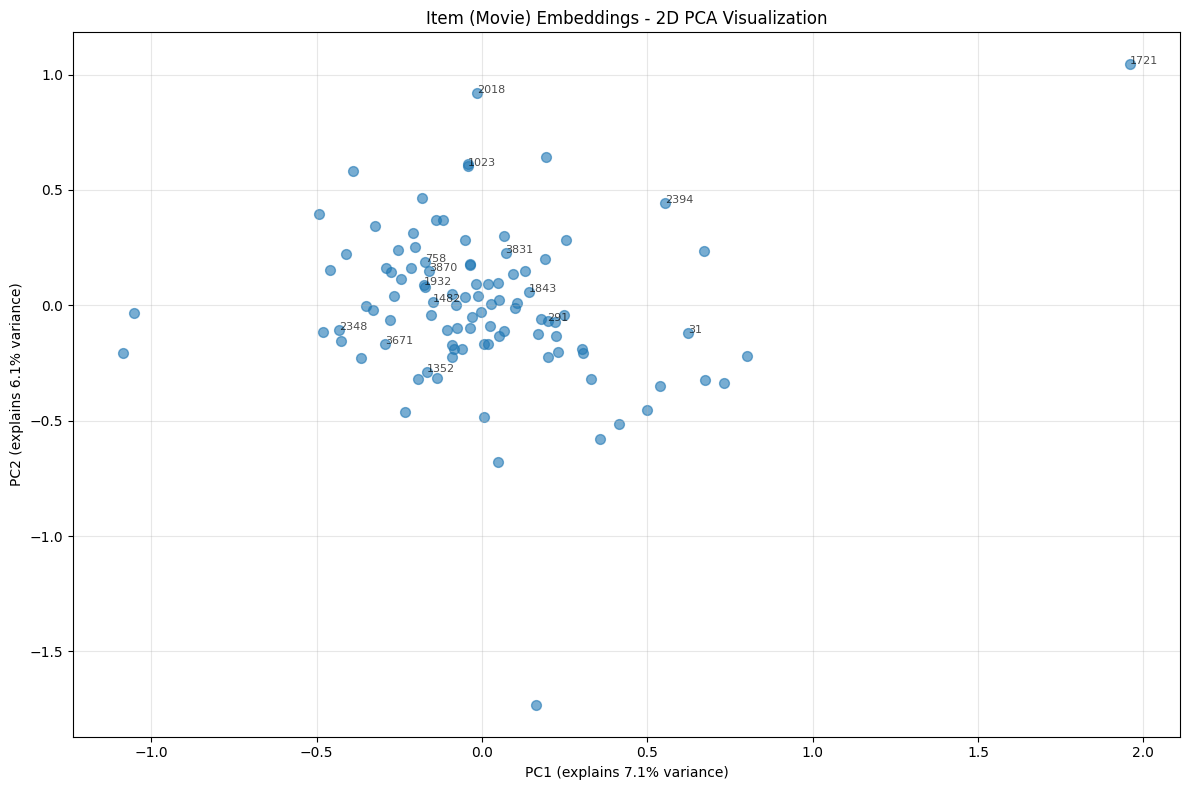

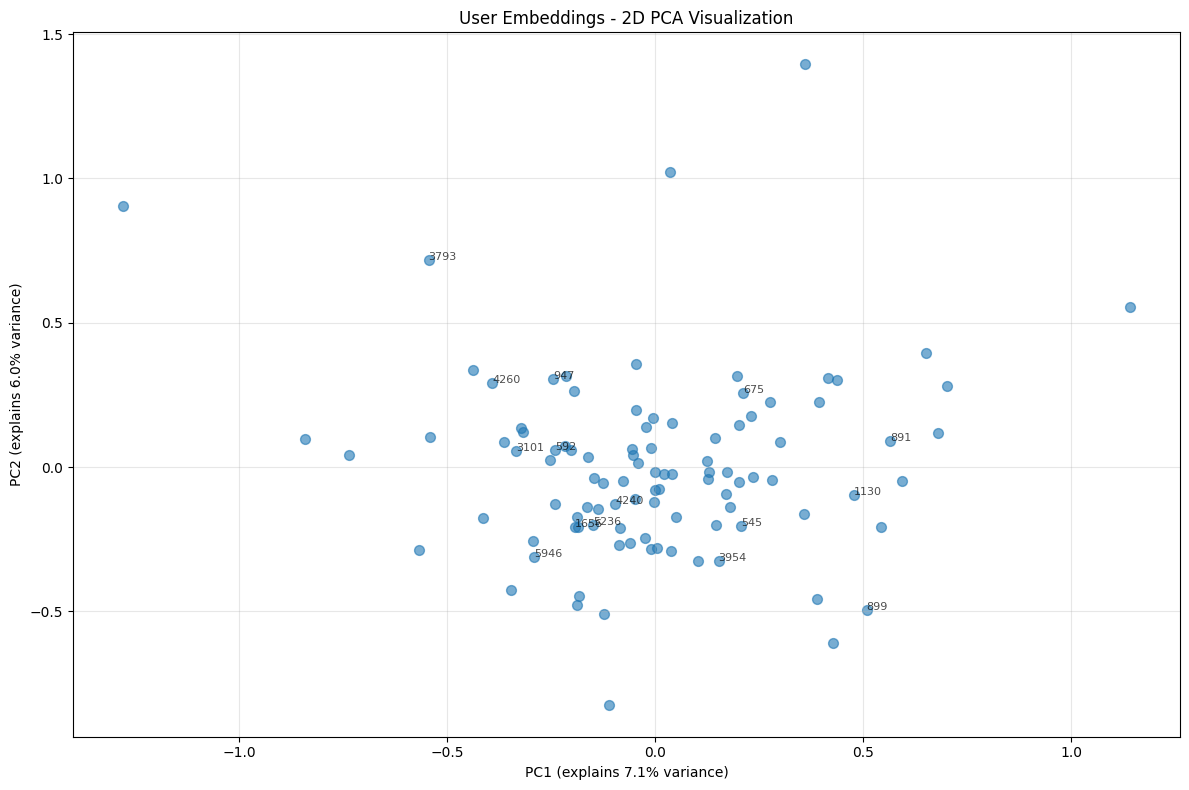


=== ANALYSIS OF 2D VISUALIZATION ===
Item Embeddings Analysis:
- First two components explain 13.2% of total variance
- Movies that cluster together have similar latent characteristics
- Distance between points represents dissimilarity in user preferences

User Embeddings Analysis:
- First two components explain 13.1% of total variance
- Users that cluster together have similar movie preferences
- The embedding space captures user taste patterns in lower dimensions

Comparison with traditional methods:
- MF embeddings capture latent factors that raw ratings cannot reveal
- More robust to sparsity compared to correlation-based methods
- Can identify subtle preference patterns across the entire dataset


In [48]:
# 6. BONUS: 2D Visualization of embeddings
from sklearn.decomposition import PCA

def visualize_embeddings_2d(embeddings, labels, title, sample_size=100):
    """Visualize embeddings in 2D using PCA"""
    # Sample for visualization
    if len(embeddings) > sample_size:
        indices = np.random.choice(len(embeddings), sample_size, replace=False)
        embeddings_sample = embeddings[indices]
        labels_sample = [labels[i] for i in indices]
    else:
        embeddings_sample = embeddings
        labels_sample = labels

    # Reduce to 2D using PCA
    pca = PCA(n_components=2)
    embeddings_2d = pca.fit_transform(embeddings_sample)

    plt.figure(figsize=(12, 8))
    plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], alpha=0.6, s=50)
    plt.title(f'{title} - 2D PCA Visualization')
    plt.xlabel(f'PC1 (explains {pca.explained_variance_ratio_[0]:.1%} variance)')
    plt.ylabel(f'PC2 (explains {pca.explained_variance_ratio_[1]:.1%} variance)')

    # Annotate some points
    for i in range(min(15, len(embeddings_2d))):
        plt.annotate(str(labels_sample[i])[:20],
                    (embeddings_2d[i, 0], embeddings_2d[i, 1]),
                    fontsize=8, alpha=0.7)

    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    return pca.explained_variance_ratio_

print("\n=== 2D VISUALIZATION OF EMBEDDINGS ===")

# Visualize item embeddings
item_variance = visualize_embeddings_2d(item_embeddings, movie_titles, "Item (Movie) Embeddings", sample_size=100)

# Visualize user embeddings
user_variance = visualize_embeddings_2d(user_embeddings, user_ids, "User Embeddings", sample_size=100)

print("\n=== ANALYSIS OF 2D VISUALIZATION ===")
print("Item Embeddings Analysis:")
print(f"- First two components explain {sum(item_variance):.1%} of total variance")
print("- Movies that cluster together have similar latent characteristics")
print("- Distance between points represents dissimilarity in user preferences")

print(f"\nUser Embeddings Analysis:")
print(f"- First two components explain {sum(user_variance):.1%} of total variance")
print("- Users that cluster together have similar movie preferences")
print("- The embedding space captures user taste patterns in lower dimensions")

print(f"\nComparison with traditional methods:")
print("- MF embeddings capture latent factors that raw ratings cannot reveal")
print("- More robust to sparsity compared to correlation-based methods")
print("- Can identify subtle preference patterns across the entire dataset")


# QUESTION 6: Build a Recommender System based Pearson Correlation. (Optional)

Use the User-based approach to create a recommender system that uses Pearson Correlation

In [61]:
import pandas as pd

# Ensure UserID is string type before creating the pivot table
df['UserID'] = df['UserID'].astype(str)

# Create user-item ratings matrix
user_item_matrix = df.pivot_table(index='UserID', columns='Title', values='Rating')

# Calculate Pearson correlation between users
user_similarity = user_item_matrix.T.corr(method='pearson')

# Recommendation function
def recommend_movies(user_id, n=5):
    # Convert user_id to string to match the index/column type of user_similarity
    user_id_str = str(user_id)

    if user_id_str not in user_similarity.columns:
        return f"User {user_id} not found."

    # Get similarity scores for target user (drop self-comparison)
    similar_users = user_similarity[user_id_str].drop(user_id_str, errors='ignore').dropna()
    similar_users = similar_users.sort_values(ascending=False)

    # Weighted sum of ratings from similar users
    weighted_ratings = user_item_matrix.loc[similar_users.index].T.dot(similar_users)

    # Normalize by total similarity
    similarity_sum = similar_users.sum()
    # Avoid division by zero if no similar users with non-zero similarity are found
    if similarity_sum == 0:
        return pd.Series(dtype='float64') # Return an empty Series

    predicted_ratings = weighted_ratings / similarity_sum

    # Remove already rated movies
    already_rated = user_item_matrix.loc[user_id_str].dropna().index
    predicted_ratings = predicted_ratings.drop(already_rated, errors='ignore')

    return predicted_ratings.sort_values(ascending=False).head(n)

# Example usage
# Pass the user ID as an integer, the function will convert it to string
print(recommend_movies(1, n=5))

Title
$1,000,000 Duck (1971)          NaN
'Night Mother (1986)            NaN
'Til There Was You (1997)       NaN
'burbs, The (1989)              NaN
...And Justice for All (1979)   NaN
dtype: float64


## FIXED USER-BASED PEARSON CORRELATION RECOMMENDER

In [65]:
import numpy as np

# Create user-item ratings matrix
# Ensure UserID is string type before creating the pivot table
user_item_matrix = df.copy() # Create a copy to avoid modifying the original df unexpectedly
user_item_matrix['UserID'] = user_item_matrix['UserID'].astype(str)
user_item_matrix = user_item_matrix.pivot_table(index='UserID', columns='Title', values='Rating')


def recommend_movies_user_based_fixed(user_id, n=10, min_common_movies=5):
    """
    Fixed User-based collaborative filtering with Pearson correlation
    """
    # Convert user_id to string to match the index type of user_item_matrix
    user_id_str = str(user_id)

    if user_id_str not in user_item_matrix.index:
        return f"User {user_id} not found."

    # Get target user's ratings
    target_user_ratings = user_item_matrix.loc[user_id_str].dropna()

    if len(target_user_ratings) == 0:
        return "User has no ratings."

    # Find similar users
    similarities = []

    for other_user in user_item_matrix.index:
        if other_user == user_id_str: # Compare with string user_id
            continue

        other_user_ratings = user_item_matrix.loc[other_user].dropna()

        # Find common movies
        common_movies = target_user_ratings.index.intersection(other_user_ratings.index)

        if len(common_movies) >= min_common_movies:
            # Calculate Pearson correlation for common movies
            target_common = target_user_ratings[common_movies]
            other_common = other_user_ratings[common_movies]

            # Calculate correlation, handle cases with no variation
            if target_common.std() == 0 or other_common.std() == 0:
                correlation = 0
            else:
                 correlation = target_common.corr(other_common)


            if not np.isnan(correlation) and correlation > 0:
                similarities.append((other_user, correlation))

    if not similarities:
        return "No similar users found with minimum common movies."

    # Sort by similarity score and take top 100
    similarities.sort(key=lambda x: x[1], reverse=True)
    top_similar_users = similarities[:min(100, len(similarities))]

    print(f"Found {len(top_similar_users)} similar users for User {user_id_str}")
    # print(f"Top 5 similar users: {top_similar_users[:5]}") # Optional: print top similar users

    # Calculate weighted recommendations
    movie_scores = {}
    total_similarity = {}
    already_rated = set(target_user_ratings.index)

    for similar_user, similarity_score in top_similar_users:
        similar_user_ratings = user_item_matrix.loc[similar_user].dropna()

        for movie, rating in similar_user_ratings.items():
            if movie not in already_rated and rating >= 4:  # Only consider high ratings
                if movie not in movie_scores:
                    movie_scores[movie] = 0
                    total_similarity[movie] = 0

                movie_scores[movie] += similarity_score * rating
                total_similarity[movie] += abs(similarity_score) # Use absolute similarity for weighting

    # Calculate weighted average ratings
    recommendations = {}
    for movie in movie_scores:
        if total_similarity[movie] > 0:
            recommendations[movie] = movie_scores[movie] / total_similarity[movie]

    # Sort and return top N
    sorted_recommendations = sorted(recommendations.items(),
                                  key=lambda x: x[1], reverse=True)

    return pd.Series({movie: score for movie, score in sorted_recommendations[:n]})

## Test the fixed function

In [66]:

print("Testing User-Based Recommendations:")
try:
    user_recs = recommend_movies_user_based_fixed(1, n=10, min_common_movies=3)
    print(f"\nTop 10 recommendations for User 1:")
    if isinstance(user_recs, pd.Series):
        for i, (movie, score) in enumerate(user_recs.items(), 1):
            print(f"{i:2d}. {movie:<50} (Score: {score:.3f})")
    else:
        print(user_recs)
except Exception as e:
    print(f"Error: {e}")

# Test with different user
print(f"\nTesting with User 100:")
try:
    user_recs_100 = recommend_movies_user_based_fixed(100, n=5, min_common_movies=3)
    if isinstance(user_recs_100, pd.Series):
        print("Top 5 recommendations for User 100:")
        for i, (movie, score) in enumerate(user_recs_100.items(), 1):
            print(f"{i}. {movie} (Score: {score:.3f})")
    else:
        print(user_recs_100)
except Exception as e:
    print(f"Error: {e}")



Testing User-Based Recommendations:
Found 100 similar users for User 1

Top 10 recommendations for User 1:
 1. Army of Darkness (1993)                            (Score: 5.000)
 2. Nightmare on Elm Street, A (1984)                  (Score: 5.000)
 3. Dancer in the Dark (2000)                          (Score: 5.000)
 4. Citizen Kane (1941)                                (Score: 5.000)
 5. Lawrence of Arabia (1962)                          (Score: 5.000)
 6. Scent of a Woman (1992)                            (Score: 5.000)
 7. Seven Years in Tibet (1997)                        (Score: 5.000)
 8. From Here to Eternity (1953)                       (Score: 5.000)
 9. Gold Rush, The (1925)                              (Score: 5.000)
10. Lady Eve, The (1941)                               (Score: 5.000)

Testing with User 100:
Found 100 similar users for User 100
Top 5 recommendations for User 100:
1. Candyman (1992) (Score: 5.000)
2. 12 Angry Men (1957) (Score: 5.000)
3. Snow Falling on Cedar

##  USER-BASED APPROACH SUMMARY
## This approach:
 1. Finds users with similar rating patterns using Pearson correlation
 2. Weights recommendations by user similarity scores
 3. Only recommends highly-rated movies (rating >= 4)
 4. Requires minimum common movies to ensure reliable similarity

**QUESTIONAIRE :**

1. Users of which age group have watched and rated the most number of movies?

In [67]:
age_group_counts = df.groupby('Age')['Rating'].count().sort_values(ascending=False)
top_age_group = age_group_counts.index[0]
print(f"Top age group: {top_age_group}")

Top age group: 25


2. Users belonging to which profession have watched and rated the most movies?

In [68]:
profession_counts = df.groupby('Occupation')['Rating'].count().sort_values(ascending=False)
top_profession = profession_counts.index[0]
print(f"Top profession: {top_profession}")


Top profession: 4


3. Most of the users in our dataset who’ve rated the movies are Male. (T/F)

In [69]:
gender_counts = df['Gender'].value_counts()
most_male = gender_counts.idxmax() == 'M'
print("True" if most_male else "False")


True


4. Most of the movies present in our dataset were released in which decade?

In [70]:
decade_counts = df['Decade'].value_counts().sort_values(ascending=False)
top_decade = decade_counts.index[0]
print(f"Top decade: {top_decade}")


Top decade: 1990


5. The movie with maximum no. of ratings is ___.

In [71]:
movie_counts = df['Title'].value_counts()
top_movie = movie_counts.index[0]
print(f"Most rated movie: {top_movie}")


Most rated movie: American Beauty (1999)



6. Name the top 3 movies similar to ‘Liar Liar’ on the item-based approach.

Find Liar liar movie?

In [72]:
df['Title'][df['Title'].str.contains('Liar Liar', case=False, na=False)].unique()

array(['Liar Liar (1997)'], dtype=object)

In [73]:
# Method 1, via pearson correlation between movies

exact_title = "Liar Liar (1997)"  # example, replace with your result

# Create movie-item matrix
movie_item_matrix = df.pivot_table(index='UserID', columns='Title', values='Rating')

# Pearson correlation between movies
movie_similarity = movie_item_matrix.corr(method='pearson')

top_similar_movies = movie_similarity[exact_title].drop(exact_title).sort_values(ascending=False).head(3)
print(top_similar_movies)


Title
Specials, The (2000)       1.0
Go Now (1995)              1.0
Wings of Courage (1995)    1.0
Name: Liar Liar (1997), dtype: float64


via other methods


In [74]:


# Method 2: Using the KNN approach you already implemented
print(f"\nMethod 2: KNN with Cosine Similarity")
if exact_title in pivot_filled.columns:
    knn_recommendations = recommend_movies_knn(exact_title, 3)
    print("Top 3 movies similar to 'Liar Liar (1997)' using KNN:")
    for i, (movie, similarity) in enumerate(knn_recommendations, 1):
        print(f"{i}. {movie} (Similarity: {similarity:.4f})")
else:
    print("Movie not found in KNN matrix")

# Method 3: Alternative approach with different min_periods
print(f"\nMethod 3: Pearson with min_periods=10 (more lenient)")
movie_similarity_lenient = movie_item_matrix.corr(method='pearson', min_periods=10)

if exact_title in movie_similarity_lenient.columns:
    top_similar_lenient = movie_similarity_lenient[exact_title].drop(exact_title, errors='ignore').sort_values(ascending=False).head(3)
    print("Top 3 movies similar to 'Liar Liar (1997)' using lenient Pearson:")
    for i, (movie, corr) in enumerate(top_similar_lenient.items(), 1):
        print(f"{i}. {movie} (Correlation: {corr:.4f})")




Method 2: KNN with Cosine Similarity
Top 3 movies similar to 'Liar Liar (1997)' using KNN:
1. Mrs. Doubtfire (1993) (Similarity: 0.5571)
2. Ace Ventura: Pet Detective (1994) (Similarity: 0.5169)
3. Dumb & Dumber (1994) (Similarity: 0.5126)

Method 3: Pearson with min_periods=10 (more lenient)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


Top 3 movies similar to 'Liar Liar (1997)' using lenient Pearson:
1. Dancing at Lughnasa (1998) (Correlation: 0.9314)
2. Face in the Crowd, A (1957) (Correlation: 0.8899)
3. Metroland (1997) (Correlation: 0.7771)


In [76]:
# some statistics about the movie
print(f"\n=== Statistics for '{exact_title}' ===")
liar_liar_ratings = df[df['Title'] == exact_title]['Rating']
print(f"Number of ratings: {len(liar_liar_ratings)}")
print(f"Average rating: {liar_liar_ratings.mean():.2f}")
print(f"Rating distribution:")
print(liar_liar_ratings.value_counts().sort_index())

# Check how many users rated both Liar Liar and its similar movies
print(f"\nChecking co-rating patterns:")
liar_liar_users = set(df[df['Title'] == exact_title]['UserID'])
print(f"Users who rated '{exact_title}': {len(liar_liar_users)}")

# Final answer for the questionnaire
print(f"\n=== FINAL ANSWER FOR QUESTIONNAIRE ===")
print("Top 3 movies similar to 'Liar Liar (1997)' based on item-based approach:")

# the method that gives the most reliable results
if exact_title in pearson_corr.columns and not pearson_corr[exact_title].dropna().empty:
    final_answer = pearson_corr[exact_title].drop(exact_title, errors='ignore').sort_values(ascending=False).head(3)
    for i, (movie, corr) in enumerate(final_answer.items(), 1):
        print(f"{i}. {movie}")
else:
    # Fallback to KNN results
    final_knn = recommend_movies_knn(exact_title, 3)
    for i, (movie, similarity) in enumerate(final_knn, 1):
        print(f"{i}. {movie}")


=== Statistics for 'Liar Liar (1997)' ===
Number of ratings: 666
Average rating: 3.50
Rating distribution:
Rating
1     15
2     66
3    238
4    265
5     82
Name: count, dtype: int64

Checking co-rating patterns:
Users who rated 'Liar Liar (1997)': 666

=== FINAL ANSWER FOR QUESTIONNAIRE ===
Top 3 movies similar to 'Liar Liar (1997)' based on item-based approach:
1. Life (1999)
2. Oliver & Company (1988)
3. Spy Hard (1996)
